In [264]:
import pandas as pd

In [265]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [266]:
data.shape

(344, 7)

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [268]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

data['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='species'>

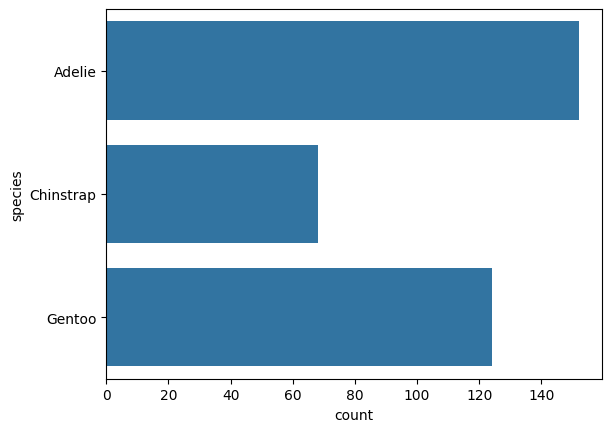

In [270]:
#visualize target -species column

sns.countplot(data['species'])

<Axes: xlabel='percent', ylabel='species'>

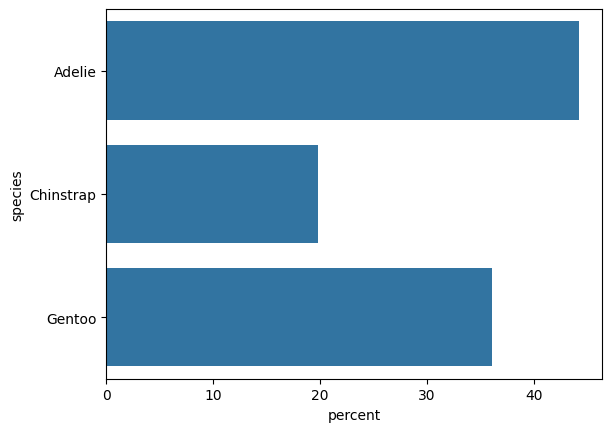

In [271]:
sns.countplot(data['species'], stat='percent')

In [272]:
# initial exploration on missing values
data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [273]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

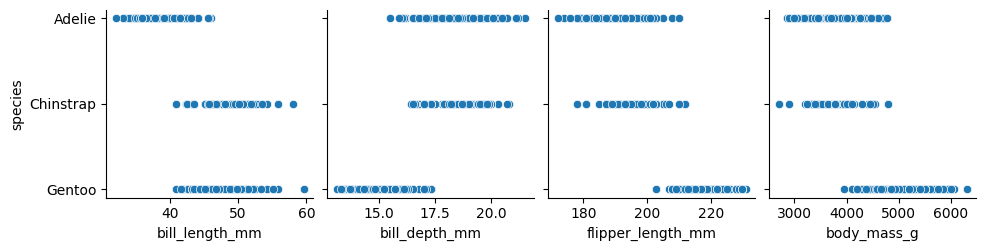

In [274]:
#continue visualization - for feature columns
numerical_cols = ['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']
sns.pairplot(data, x_vars=numerical_cols, y_vars='species')

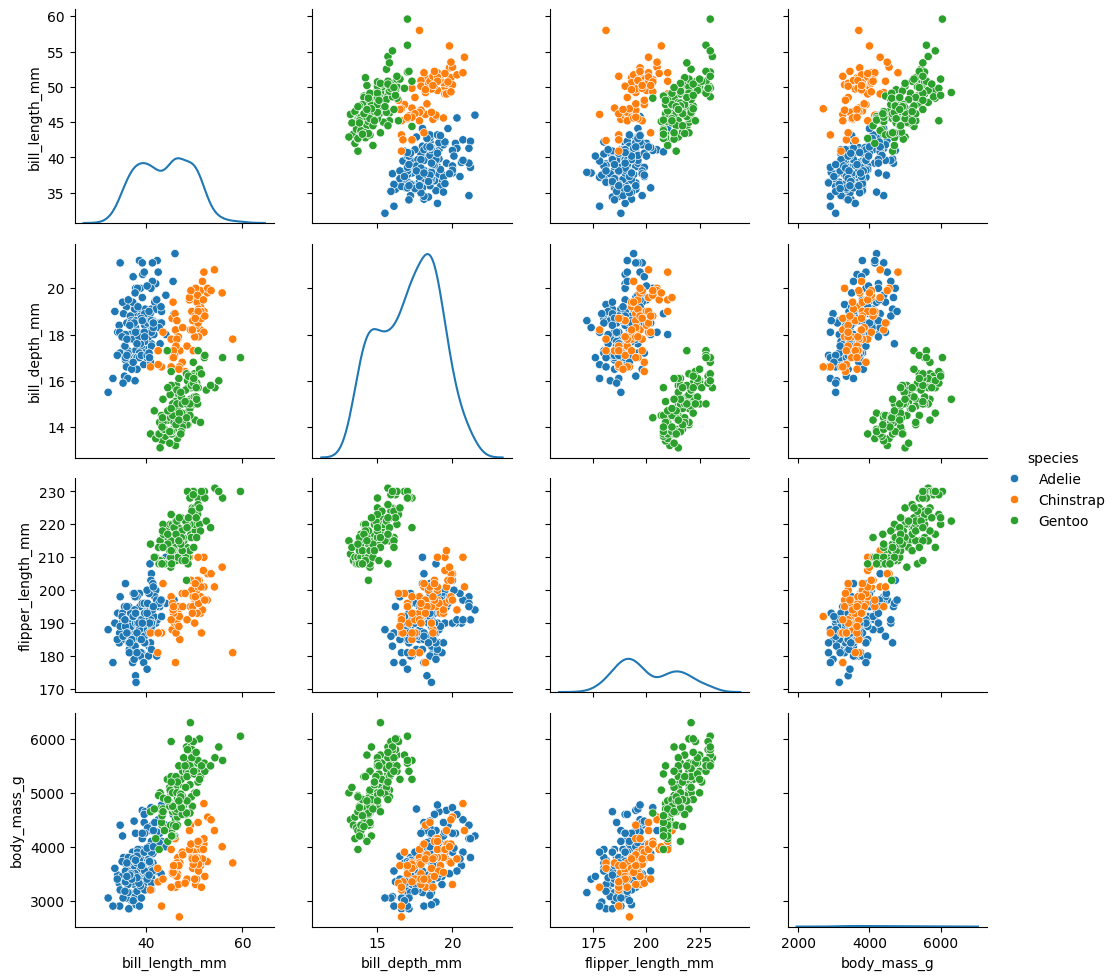

In [275]:
g = sns.PairGrid(data, hue='species')
g.map_diag(sns.kdeplot, hue=None)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<Axes: xlabel='bill_length_mm', ylabel='Count'>

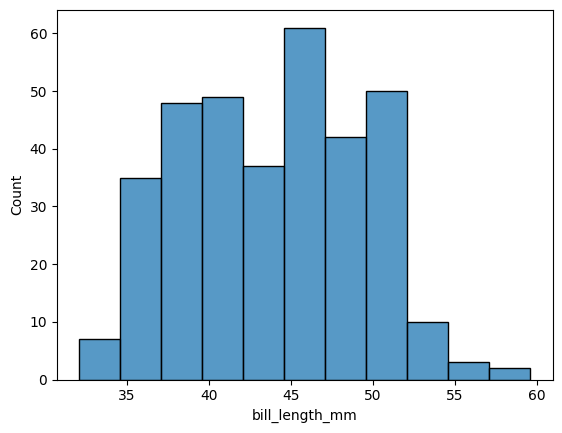

In [276]:
#filling missing values
data['bill_length_mm'] = data['bill_length_mm'].fillna(data['bill_length_mm'].median())
sns.histplot( data['bill_length_mm'])

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

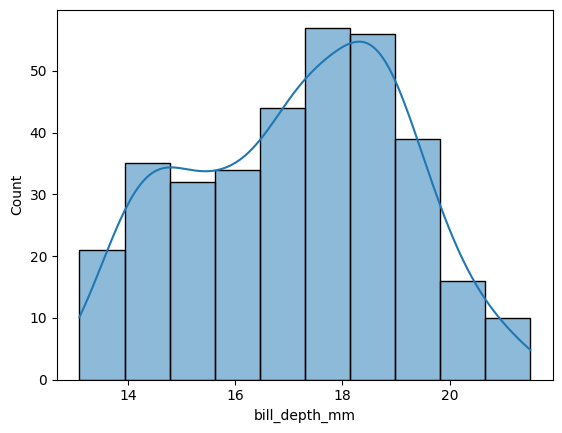

In [277]:
#filling missing values
data['bill_depth_mm'] = data['bill_depth_mm'].fillna(data['bill_depth_mm'].median())
sns.histplot(data['bill_depth_mm'], kde=True)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

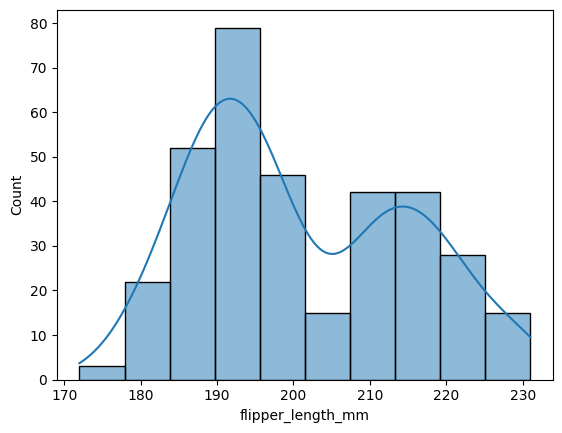

In [278]:
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(data['flipper_length_mm'].median())
sns.histplot(data['flipper_length_mm'], kde=True)

In [279]:
# transformation on data['body_mass_g'] 
data['body_mass_g'] = np.sqrt(data['body_mass_g'])

<Axes: xlabel='body_mass_g', ylabel='Count'>

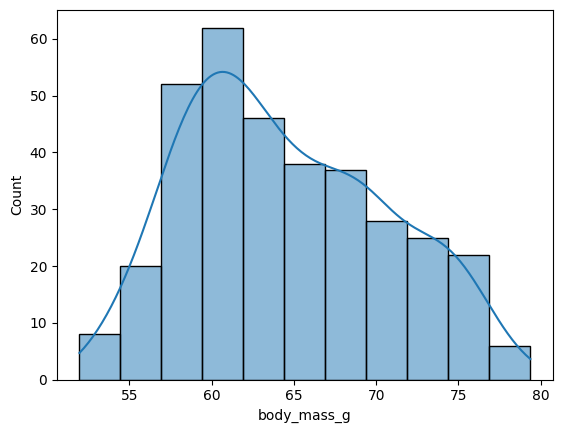

In [280]:
sns.histplot(data['body_mass_g'].fillna(data['body_mass_g'].mean()), kde=True)

In [281]:
data['body_mass_g'] = data['body_mass_g'].fillna(data['body_mass_g'].mean())

In [282]:
data['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='sex'>

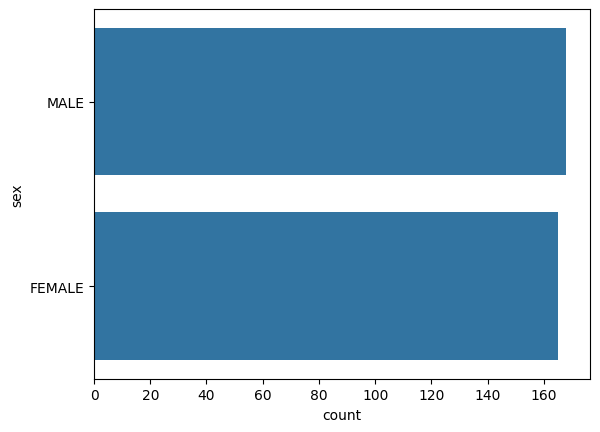

In [283]:
sns.countplot(data['sex'])

In [284]:
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [285]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

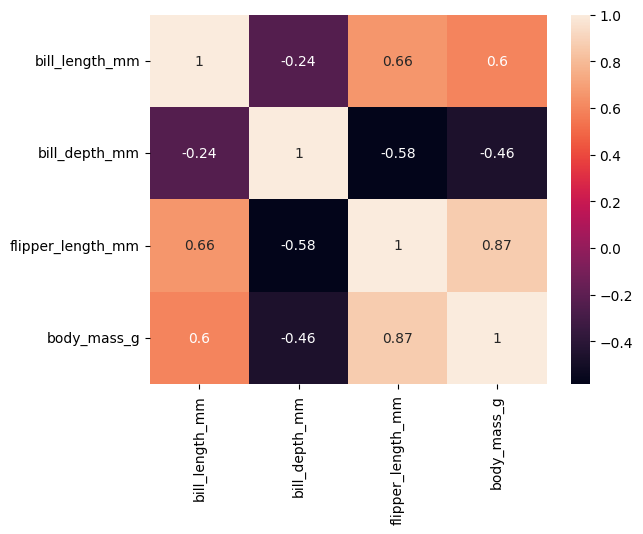

In [286]:
#correlation matrix
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True)

In [287]:
data['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<Axes: xlabel='island', ylabel='flipper_length_mm'>

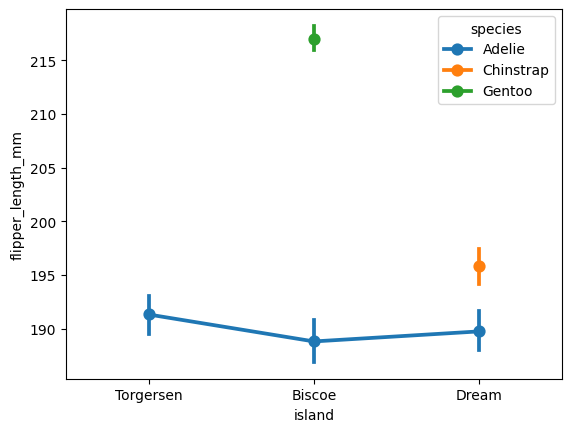

In [288]:
sns.pointplot(data, x='island', y='flipper_length_mm', hue='species')

In [289]:
data[['island','sex']]

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
3,Torgersen,MALE
4,Torgersen,FEMALE
...,...,...
339,Biscoe,MALE
340,Biscoe,FEMALE
341,Biscoe,MALE
342,Biscoe,FEMALE


In [290]:
# feature engineering
#one hot encoding for both categorical features
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
encoded_data = ohe.fit_transform(data[['island','sex']])

ohe_cols = ohe.get_feature_names_out(['island','sex'])
encoded_data = pd.DataFrame(encoded_data, columns=ohe_cols, index=data.index)


In [291]:
# add ohe cols back to data
data = pd.concat([data, encoded_data], axis=1)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,Torgersen,39.10,18.7,181.0,61.237244,MALE,0.0,0.0,1.0,0.0,1.0
1,Adelie,Torgersen,39.50,17.4,186.0,61.644140,FEMALE,0.0,0.0,1.0,1.0,0.0
2,Adelie,Torgersen,40.30,18.0,195.0,57.008771,FEMALE,0.0,0.0,1.0,1.0,0.0
3,Adelie,Torgersen,44.45,17.3,197.0,64.532834,MALE,0.0,0.0,1.0,0.0,1.0
4,Adelie,Torgersen,36.70,19.3,193.0,58.736701,FEMALE,0.0,0.0,1.0,1.0,0.0


In [292]:
data.drop(['island','sex'], inplace=True, axis=1)

In [293]:
features=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_FEMALE', 'sex_MALE']

In [316]:
from sklearn.model_selection import train_test_split
X = data[features]
y = data['species']
#split the data in train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [295]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    
    ('scaler', StandardScaler())
]
)

In [317]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', random_state=42, multi_class='ovr')
X_train_rescaled = pipe.fit_transform(X_train)
log_model.fit(X_train, y_train)

c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anjal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=42)

In [346]:
# predict for both train and test data
y_pred_train = log_model.predict(X_train)

X_test_rescaled = pipe.fit_transform(X_test)

y_pred_test = log_model.predict(X_test)
y_probs_test = log_model.predict_proba(X_test)


In [319]:
from sklearn import metrics

#evaluation metrics
def eval_metrics(test, pred):
    acc = metrics.accuracy_score(test, pred)
    precision = metrics.precision_score(test, pred, average='macro')
    recall = metrics.recall_score(test, pred, average='macro')
    return acc, precision, recall

def print_metrics(test, pred):
    acc, precision, recall = eval_metrics(test, pred)
    print(f"Accuracy score : {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")


In [328]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer().fit(y_train)
y_test_ohe = lb.transform(y_test)

In [329]:
metrics.roc_auc_score(y_test_ohe, y_probs_test, average='macro', multi_class='ovr')

0.9984816990455961

In [362]:
fpr, tpr, _ = metrics.roc_curve(y_test_ohe, y_probs_test)


ValueError: multilabel-indicator format is not supported

<Figure size 640x480 with 0 Axes>

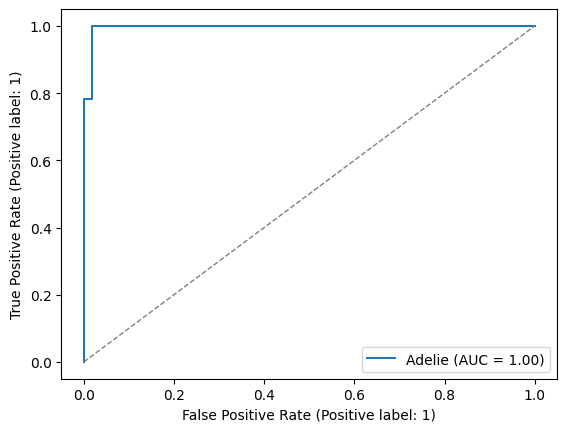

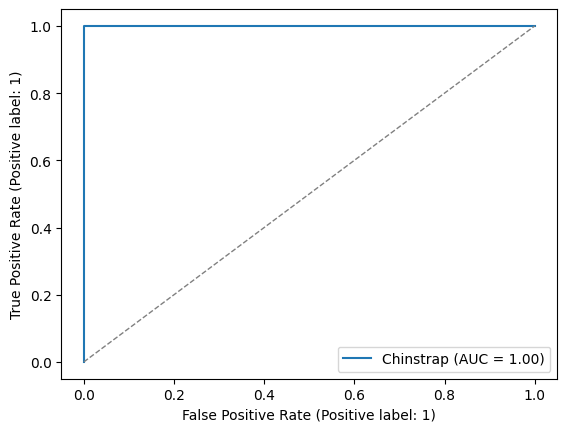

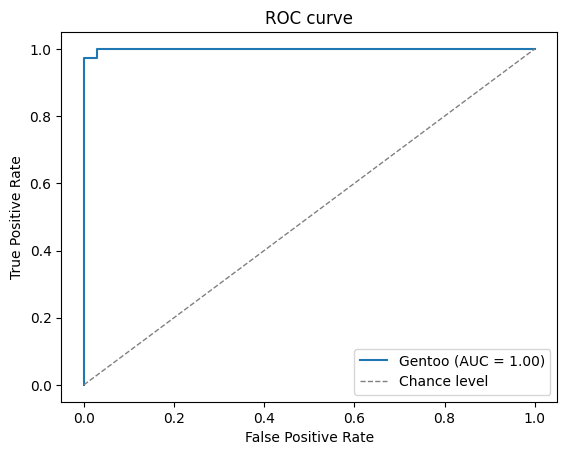

In [361]:
plt.figure()
for i, specie in enumerate(log_model.classes_):
    metrics.RocCurveDisplay.from_predictions(
        y_test_ohe[:, i],
        y_probs_test[:, i],
        #ax=plt.gca(),
        name=specie,
        
    )
    plt.plot([0,1], [0,1], color="grey", label = "Chance level", linestyle="--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend(loc='lower right')
plt.show()

In [347]:
print("Train dataset")
print_metrics(y_train, y_pred_train)

print("\nTest data")
print_metrics(y_test, y_pred_test)

Train dataset
Accuracy score: 1.0
Precision: 1.0
Recall: 1.0

Test data
Accuracy score: 0.9807692307692307
Precision: 0.9776021080368906
Recall: 0.9837446141793968


In [359]:
for i, specie in enumerate(log_model.classes_):
    print(f"\nClass {specie}")
    print_metrics(y_test_ohe[:, i], lb.transform(y_pred_test)[:, i])



Class Adelie
Accuracy score: 0.9807692307692307
Precision: 0.9805097451274363
Recall: 0.9805097451274363

Class Chinstrap
Accuracy score: 0.9903846153846154
Precision: 0.9772727272727273
Recall: 0.9939759036144578

Class Gentoo
Accuracy score: 0.9903846153846154
Precision: 0.9926470588235294
Recall: 0.9864864864864865


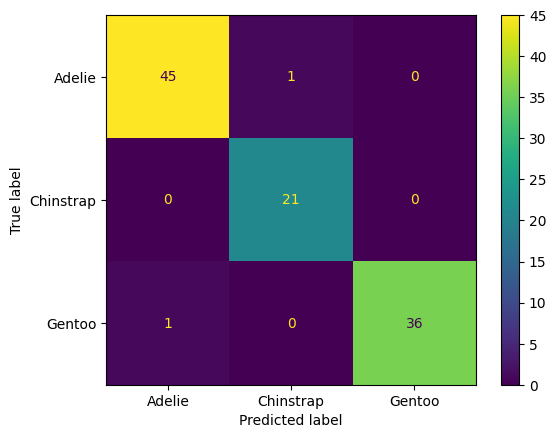

In [360]:
# confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred_test)
metrics.ConfusionMatrixDisplay(cm, display_labels=log_model.classes_).plot()